In [26]:
# LOAD DATA
import pandas as pd

df = pd.read_csv("name_gender.csv")
df

,nama,jk
0,rasminah,P
1,panggiani,P
2,jumiati,P
3,fatmawati,P
4,irfan efendi,L
...,...,...
1115108,kamiharjo,L
1115109,tomas kristian yuda aprilianto,L
1115110,billi agustinus hariyono,L
1115111,rasyid hidayat,L


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115113 entries, 0 to 1115112
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   nama    1115113 non-null  object
 1   jk      1115113 non-null  object
dtypes: object(2)
memory usage: 17.0+ MB


In [58]:
df.isnull().sum()

nama    0
jk      0
dtype: int64

<AxesSubplot:>

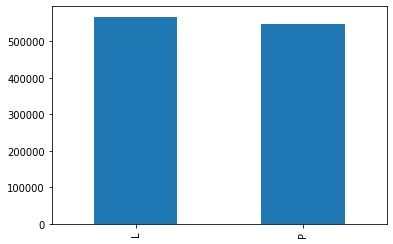

In [64]:
# Perbandingan Jumlah Gender Laki-laki dan Perempuan
df["jk"].value_counts().plot(kind = "bar")

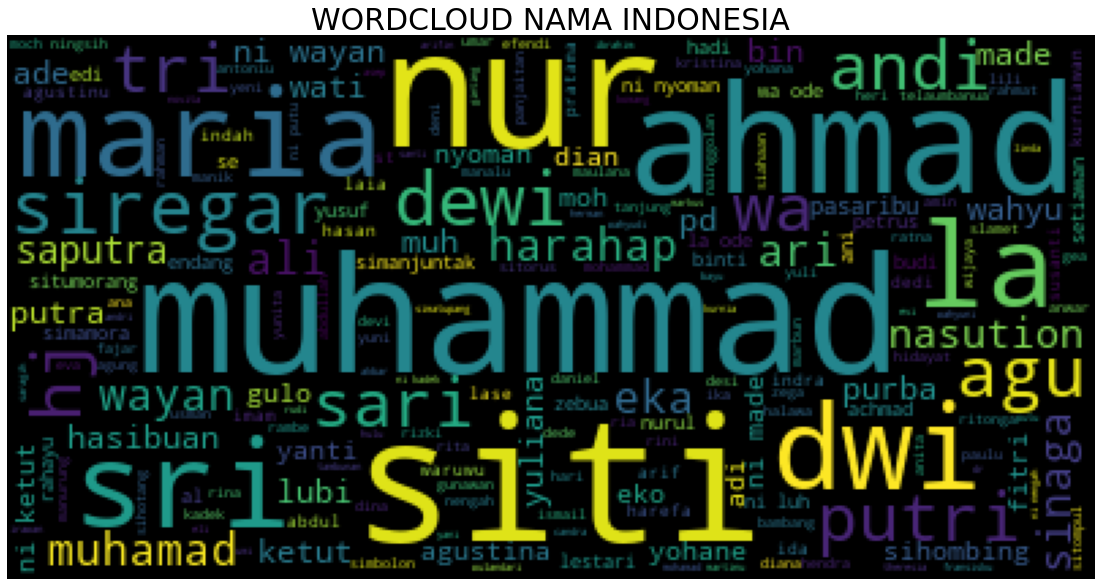

In [69]:
# VISUALISASI WORDCLOUD NAMA INDONESIA
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud().generate(' '.join(df['nama']))

plt.figure(figsize = (20,10))
plt.title("WORDCLOUD NAMA INDONESIA",size = 30)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [65]:
# Partisi data Training Dan Testing dengan rasio 80:20
from sklearn.model_selection import train_test_split as tts

x = df["nama"].values
y = df["jk"].values

x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2,random_state = 100)

In [28]:
# Vektorisasi menggunakan countvectorizer (Nilai didapatkan dari frekuensi kata X pada setiap dokumen)
# Menjadikan array pada data training dan x (untuk validasi silang)
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)
x  = vect.transform(x)

In [29]:
# Fitting model dengan MNB
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [30]:
# Menampilkan akurasi pada testing, performa prediksi sangat baik mengingat perhitungan naive bayes dengan
# data yang sangat besar cukup cepat dibandingkan algoritma lainya
from sklearn.metrics import accuracy_score

y_pred = nb.predict(x_test)
accuracy_score(y_pred,y_test)

0.8800527299874901

In [31]:
# melakukan validasi silang untuk menguji model dengan menggeneralisir dataset
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(MultinomialNB(),x,y,cv=10,scoring = "accuracy")
print(cross_val)

[0.88395868 0.87513451 0.8789368  0.87846042 0.87788649 0.87975177
 0.88250486 0.88447776 0.88602021 0.88456744]


In [32]:
# rata-rata nilai dari 10 skor validasi silang
print(cross_val.mean())

0.8811698953197551


In [68]:
# Test model dengan user input
nama = input("nama: ")
pred = nb.predict(vect.transform([nama.lower()]))
if pred[0] == "P":
    print("PEREMPUAN")
elif pred[0] == "L":
    print("LAKI-LAKI")

nama: hardian alkori
LAKI-LAKI
